<a href="https://colab.research.google.com/github/Jatin94500/Google-Collab/blob/main/air_Qua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xarray netCDF4 matplotlib cartopy

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import getpass

username = input("Enter NASA Earthdata Username: ")
password = getpass.getpass("Enter NASA Earthdata Password: ")

with open('/root/.netrc', 'w') as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}")
!chmod 600 /root/.netrc

Enter NASA Earthdata Username: jatin94500
Enter NASA Earthdata Password: ··········


In [ ]:
import os
import requests

os.makedirs("aod_nc4_files", exist_ok=True)

with open("subset_M2TUNXAER_5.12.4_20250706_182128_.txt", "r") as f:
    urls = f.read().splitlines()

for url in urls:
    filename = url.split("/")[-1]
    filepath = os.path.join("aod_nc4_files", filename)

    if not os.path.exists(filepath):
        response = requests.get(url, stream=True)
        with open(filepath, 'wb') as f_out:
            f_out.write(response.content)
        print(f"Downloaded: {filename}")
    else:
        print(f"Already exists: {filename}")

Downloaded: MERRA2.README.pdf
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202212.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202301.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202302.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202303.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202304.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202305.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202306.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202307.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202308.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202309.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202310.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202311.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202312.nc4
Downloaded: MERRA2_400.tavgU_2d_aer_Nx.202401.nc4


In [ ]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

folder_path = "/content/aod_nc4_files"
aod_data = {}

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".nc4"):
        path = os.path.join(folder_path, file)
        try:
            ds = xr.open_dataset(path)

            aod = ds['TOTEXTTAU']

            aod_india = aod.sel(lat=slice(6, 38), lon=slice(68, 98))

            if 'time' in aod_india.dims:
                aod_india_2d = aod_india.isel(time=0).squeeze()

                parts = file.split('.')
                if len(parts) > 2:
                    date_str = parts[2]
                    aod_data[date_str] = aod_india_2d
                    print(f" Processed AOD for {date_str} (selected first time step)")
                else:
                    print(f" Could not extract date from filename: {file}")
            else:
                 print(f" Data for {file} does not have a 'time' dimension after subsetting. Dimensions: {aod_india.dims}")
                 if aod_india.ndim == 2:
                     parts = file.split('.')
                     if len(parts) > 2:
                         date_str = parts[2]
                         aod_data[date_str] = aod_india
                         print(f" Processed AOD for {date_str} (already 2D)")
                     else:
                         print(f" Could not extract date from filename: {file}")
                 else:
                      print(f" Data for {file} is not 2D and has no 'time' dimension. Skipping. Dimensions: {aod_india.dims}")


        except Exception as e:
            print(f" Error processing file {file}: {e}")

if not aod_data:
    print("\n No 2D AOD data was successfully processed and stored.")
else:
    print("\n Finished processing files. AOD data stored for the following months:")
    for month_key in aod_data.keys():
        print(month_key)

✅ Processed AOD for 202212 (selected first time step)
✅ Processed AOD for 202301 (selected first time step)
✅ Processed AOD for 202302 (selected first time step)
✅ Processed AOD for 202303 (selected first time step)
✅ Processed AOD for 202304 (selected first time step)
✅ Processed AOD for 202305 (selected first time step)
✅ Processed AOD for 202306 (selected first time step)
✅ Processed AOD for 202307 (selected first time step)
✅ Processed AOD for 202308 (selected first time step)
✅ Processed AOD for 202309 (selected first time step)
✅ Processed AOD for 202310 (selected first time step)
✅ Processed AOD for 202311 (selected first time step)
✅ Processed AOD for 202312 (selected first time step)
✅ Processed AOD for 202401 (selected first time step)

✅ Finished processing files. AOD data stored for the following months:
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311
202312
202401


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


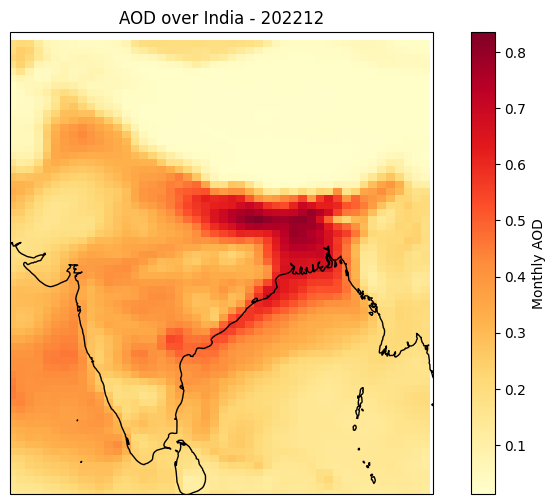

In [ ]:
month = '202212'

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
aod_data[month].plot.pcolormesh(ax=ax, cmap='YlOrRd', cbar_kwargs={'label': 'Monthly AOD'})
ax.set_extent([68, 98, 6, 38])
ax.coastlines()
ax.set_title(f"AOD over India - {month}")
plt.show()

In [ ]:
import pandas as pd

for date, aod_da in aod_data.items():
    df = aod_da.to_dataframe(name="AOD").reset_index()
    df.to_csv(f"AOD_{date}_India.csv", index=False)
    print(f" Exported AOD_{date}_India.csv")

📁 Exported AOD_202212_India.csv
📁 Exported AOD_202301_India.csv
📁 Exported AOD_202302_India.csv
📁 Exported AOD_202303_India.csv
📁 Exported AOD_202304_India.csv
📁 Exported AOD_202305_India.csv
📁 Exported AOD_202306_India.csv
📁 Exported AOD_202307_India.csv
📁 Exported AOD_202308_India.csv
📁 Exported AOD_202309_India.csv
📁 Exported AOD_202310_India.csv
📁 Exported AOD_202311_India.csv
📁 Exported AOD_202312_India.csv
📁 Exported AOD_202401_India.csv


In [ ]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

folder_path = "/content/aod_nc4_files"
output_folder = "/content/aod_maps"
os.makedirs(output_folder, exist_ok=True)

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".nc4"):
        filepath = os.path.join(folder_path, file)
        try:
            ds = xr.open_dataset(filepath)

            aod = ds['TOTEXTTAU']
            if 'time' in aod.dims:
                 aod_2d = aod.isel(time=0).squeeze()
            else:
                 aod_2d = aod.squeeze()

            aod_india = aod_2d.sel(lat=slice(6, 38), lon=slice(68, 98))

            if aod_india.ndim != 2:
                 print(f" Data for {file} is not 2D before plotting. Dimensions: {aod_india.dims}, Shape: {aod_india.shape}")

            parts = file.split('.')
            if len(parts) > 2:
                month = parts[2]
            else:
                month = "Unknown_Month"
                print(f" Could not extract date from filename for plotting title: {file}")


            plt.figure(figsize=(10, 6))
            ax = plt.axes(projection=ccrs.PlateCarree())
            aod_india.plot.pcolormesh(ax=ax, cmap='YlOrRd', cbar_kwargs={'label': 'AOD'})
            ax.set_extent([68, 98, 6, 38])
            ax.coastlines()
            ax.add_feature(cfeature.BORDERS, linewidth=0.5)
            ax.set_title(f"Monthly AOD over India - {month}")

            out_file = os.path.join(output_folder, f"AOD_India_{month}.png")
            plt.savefig(out_file, dpi=300)
            plt.close()
            print(f" Saved: {out_file}")

        except Exception as e:
            print(f" Error processing or plotting file {file}: {e}")

✅ Saved: /content/aod_maps/AOD_India_202212.png
✅ Saved: /content/aod_maps/AOD_India_202301.png
✅ Saved: /content/aod_maps/AOD_India_202302.png
✅ Saved: /content/aod_maps/AOD_India_202303.png
✅ Saved: /content/aod_maps/AOD_India_202304.png
✅ Saved: /content/aod_maps/AOD_India_202305.png
✅ Saved: /content/aod_maps/AOD_India_202306.png
✅ Saved: /content/aod_maps/AOD_India_202307.png
✅ Saved: /content/aod_maps/AOD_India_202308.png
✅ Saved: /content/aod_maps/AOD_India_202309.png
✅ Saved: /content/aod_maps/AOD_India_202310.png
✅ Saved: /content/aod_maps/AOD_India_202311.png
✅ Saved: /content/aod_maps/AOD_India_202312.png
✅ Saved: /content/aod_maps/AOD_India_202401.png


In [ ]:
import xarray as xr
import os
import pandas as pd

folder_path = "/content/aod_nc4_files"
monthly_averages = []

for file in sorted(os.listdir(folder_path)):
    if file.endswith(".nc4"):
        filepath = os.path.join(folder_path, file)
        ds = xr.open_dataset(filepath)

        aod = ds['TOTEXTTAU'].squeeze()

        aod_india = aod.sel(lat=slice(6, 38), lon=slice(68, 98))

        avg_aod = float(aod_india.mean().values)

        month = file.split('.')[-1]
        monthly_averages.append({'Month': month, 'Avg_AOD': avg_aod})

df = pd.DataFrame(monthly_averages)
df.to_csv('/content/monthly_aod_india.csv', index=False)
print(" Saved monthly AOD averages to: /content/monthly_aod_india.csv")

✅ Saved monthly AOD averages to: /content/monthly_aod_india.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subset_M2IMNXASM_5.12.4_20250706_142535_.txt to subset_M2IMNXASM_5.12.4_20250706_142535_.txt


In [ ]:
import getpass

username = input(" Enter your NASA Earthdata username: ")
password = getpass.getpass(" Enter your NASA Earthdata password: ")

🔐 Enter your NASA Earthdata username: jatin94500
🔐 Enter your NASA Earthdata password: ··········


In [ ]:
import os

download_dir = "/content/nc4_data"
os.makedirs(download_dir, exist_ok=True)

txt_file = "subset_M2IMNXASM_5.12.4_20250706_142535_.txt"

with open(txt_file, "r") as f:
    urls = f.read().splitlines()

netrc_path = "/root/.netrc"
with open(netrc_path, "w") as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}\n")

os.chmod(netrc_path, 0o600)

for url in urls:
    print(f" Downloading: {os.path.basename(url)}")
    os.system(f"wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies --auth-no-challenge=on -q -P {download_dir} --no-check-certificate {url}")

print("\n All files downloaded to:", download_dir)

📥 Downloading: MERRA2.README.pdf
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202212.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202301.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202302.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202303.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202304.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202305.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202306.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202307.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202308.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202309.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202310.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202311.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202312.nc4
📥 Downloading: MERRA2_400.instM_2d_asm_Nx.202401.nc4

✅ All files downloaded to: /content/nc4_data


In [ ]:
import os
import requests
import xarray as xr

if os.path.exists(download_dir) and os.listdir(download_dir):
  nc4_files = [f for f in os.listdir(download_dir) if f.endswith('.nc4')]
  if nc4_files:
    first_nc4_file_path = os.path.join(download_dir, nc4_files[0])
    try:
      ds = xr.open_dataset(first_nc4_file_path)
      print(f"\n Successfully read the first .nc4 file: {first_nc4_file_path}")
      print("Dataset Info:")
      print(ds)

    except Exception as e:
      print(f" Error reading .nc4 file {first_nc4_file_path}: {e}")
  else:
    print("\n No .nc4 files found in the download directory.")
else:
  print("\n Download directory does not exist or is empty.")


✅ Successfully read the first .nc4 file: /content/nc4_data/MERRA2_400.instM_2d_asm_Nx.202401.nc4
Dataset Info:
<xarray.Dataset> Size: 40MB
Dimensions:     (lon: 576, lat: 361, time: 1)
Coordinates:
  * lon         (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat         (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time        (time) datetime64[ns] 8B 2024-01-01
Data variables: (12/48)
    DISPH       (time, lat, lon) float32 832kB ...
    PS          (time, lat, lon) float32 832kB ...
    QV10M       (time, lat, lon) float32 832kB ...
    QV2M        (time, lat, lon) float32 832kB ...
    SLP         (time, lat, lon) float32 832kB ...
    T10M        (time, lat, lon) float32 832kB ...
    ...          ...
    Var_U10M    (time, lat, lon) float32 832kB ...
    Var_U2M     (time, lat, lon) float32 832kB ...
    Var_U50M    (time, lat, lon) float32 832kB ...
    Var_V10M    (time, lat, lon) float32 832kB ...
    Var_V2M     (time, lat, lon) float32

Available variables: ['BCANGSTR', 'BCCMASS', 'BCEXTTAU', 'BCFLUXU', 'BCFLUXV', 'BCSCATAU', 'BCSMASS', 'DMSCMASS', 'DMSSMASS', 'DUANGSTR', 'DUCMASS', 'DUCMASS25', 'DUEXTT25', 'DUEXTTAU', 'DUFLUXU', 'DUFLUXV', 'DUSCAT25', 'DUSCATAU', 'DUSMASS', 'DUSMASS25', 'OCANGSTR', 'OCCMASS', 'OCEXTTAU', 'OCFLUXU', 'OCFLUXV', 'OCSCATAU', 'OCSMASS', 'SO2CMASS', 'SO2SMASS', 'SO4CMASS', 'SO4SMASS', 'SSANGSTR', 'SSCMASS', 'SSCMASS25', 'SSEXTT25', 'SSEXTTAU', 'SSFLUXU', 'SSFLUXV', 'SSSCAT25', 'SSSCATAU', 'SSSMASS', 'SSSMASS25', 'SUANGSTR', 'SUEXTTAU', 'SUFLUXU', 'SUFLUXV', 'SUSCATAU', 'TOTANGSTR', 'TOTEXTTAU', 'TOTSCATAU']


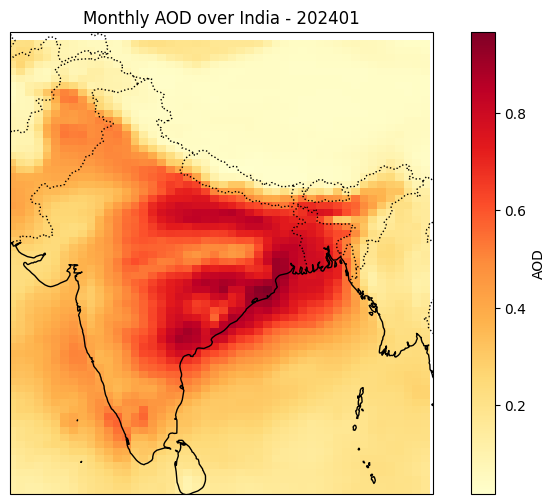

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

folder_path = "/content/aod_nc4_files"
file_name = "MERRA2_400.tavgU_2d_aer_Nx.202401.nc4"
file_path = os.path.join(folder_path, file_name)


try:
    ds = xr.open_dataset(file_path)

    print("Available variables:", list(ds.data_vars))

    aod_var = "TOTEXTTAU"

    aod = ds[aod_var]
    if 'time' in aod.dims:
        aod_2d = aod.isel(time=0).squeeze()
    else:
        aod_2d = aod.squeeze()

    if aod_2d.ndim != 2:
        print(f"Error: Data is not 2D after processing. Dimensions: {aod_2d.dims}. Cannot plot.")
    else:
        aod_india = aod_2d.sel(lat=slice(6, 38), lon=slice(68, 98))


        plt.figure(figsize=(10, 6))
        ax = plt.axes(projection=ccrs.PlateCarree())
        aod_india.plot.pcolormesh(ax=ax, cmap='YlOrRd', cbar_kwargs={'label': 'AOD'})
        ax.set_extent([68, 98, 6, 38])
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        plt.title(f"Monthly AOD over India - {file_name.split('.')[-2]}")
        plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except KeyError:
    print(f"Error: Variable '{aod_var}' not found in the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

folder_path = "/content/aod_nc4_data/"
aod_var = "TOTEXTTAU"

files = sorted(glob.glob(os.path.join(folder_path, "*.nc4")))

for file in files:
    filename = os.path.basename(file)
    month = filename.split('.')[-2]

    try:
        ds = xr.open_dataset(file)
        aod = ds[aod_var].sel(lat=slice(6, 38), lon=slice(68, 98)).mean(dim='time')

        plt.figure(figsize=(10, 6))
        ax = plt.axes(projection=ccrs.PlateCarree())
        aod.plot(ax=ax, cmap='YlOrRd', cbar_kwargs={'label': 'AOD'})
        ax.set_extent([68, 98, 6, 38])
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_title(f"AOD over India - {month}")
        plt.show()

    except Exception as e:
        print(f" Failed to process {filename}: {e}")

In [ ]:
!pip install requests pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subset_M2TMNXAER_5.12.4_20250706_210131_.txt to subset_M2TMNXAER_5.12.4_20250706_210131_.txt


In [ ]:
import getpass

username = input("Enter NASA Earthdata Username: ")
password = getpass.getpass("Enter NASA Earthdata Password: ")

with open('/root/.netrc', 'w') as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}")
!chmod 600 /root/.netrc

Enter NASA Earthdata Username: jatin94500
Enter NASA Earthdata Password: ··········


In [ ]:
import requests
from tqdm import tqdm

txt_file_path = 'subset_M2IMNXASM_5.12.4_20250706_142535_.txt'

with open(txt_file_path, 'r') as f:
    urls = [line.strip() for line in f if line.strip().endswith('.nc4')]

import os
output_dir = "downloaded_nc4"
os.makedirs(output_dir, exist_ok=True)

for url in tqdm(urls):
    filename = os.path.join(output_dir, os.path.basename(url))
    if not os.path.exists(filename):
        response = requests.get(url, auth=('username', 'password'))
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Failed: {url} Status Code: {response.status_code}")

100%|██████████| 14/14 [01:24<00:00,  6.06s/it]


In [ ]:
import os
import requests
from tqdm import tqdm

txt_file_path = '/content/subset_M2IMNXASM_5.12.4_20250706_142535_.txt'
output_dir = '/content/downloaded_nc4'
os.makedirs(output_dir, exist_ok=True)

username = 'jatin94500'
password = '@Jatin9450023698'

with open(txt_file_path, 'r') as f:
    urls = [line.strip() for line in f if line.strip().endswith('.nc4')]

for url in tqdm(urls, desc="Downloading files"):
    filename = os.path.join(output_dir, os.path.basename(url))
    if not os.path.exists(filename):
        r = requests.get(url, auth=(username, password))
        if r.status_code == 200:
            with open(filename, 'wb') as f_out:
                f_out.write(r.content)
        else:
            print(f" Failed to download {url}  {r.status_code}")

In [ ]:
import xarray as xr
import os

def check_if_covers_india(nc_file):
    ds = xr.open_dataset(nc_file)
    if 'lat' in ds and 'lon' in ds:
        lat = ds['lat'].values
        lon = ds['lon'].values
        return (
            (lat.min() <= 8) and (lat.max() >= 37) and
            (lon.min() <= 68) and (lon.max() >= 97)
        )
    return False

sample_file = os.path.join(output_dir, os.listdir(output_dir)[0])
print(" Covers India" if check_if_covers_india(sample_file) else " Doesn't cover India")

✅ Covers India


In [ ]:
!pip install xarray netCDF4 numpy matplotlib cartopy --quiet

In [ ]:
import xarray as xr
import os

sample_file = os.path.join("downloaded_nc4", os.listdir("downloaded_nc4")[0])
ds = xr.open_dataset(sample_file)
print(ds.data_vars)

Data variables:
    DISPH       (time, lat, lon) float32 832kB ...
    PS          (time, lat, lon) float32 832kB ...
    QV10M       (time, lat, lon) float32 832kB ...
    QV2M        (time, lat, lon) float32 832kB ...
    SLP         (time, lat, lon) float32 832kB ...
    T10M        (time, lat, lon) float32 832kB ...
    T2M         (time, lat, lon) float32 832kB ...
    TO3         (time, lat, lon) float32 832kB ...
    TOX         (time, lat, lon) float32 832kB ...
    TQI         (time, lat, lon) float32 832kB ...
    TQL         (time, lat, lon) float32 832kB ...
    TQV         (time, lat, lon) float32 832kB ...
    TROPPB      (time, lat, lon) float32 832kB ...
    TROPPT      (time, lat, lon) float32 832kB ...
    TROPPV      (time, lat, lon) float32 832kB ...
    TROPQ       (time, lat, lon) float32 832kB ...
    TROPT       (time, lat, lon) float32 832kB ...
    TS          (time, lat, lon) float32 832kB ...
    U10M        (time, lat, lon) float32 832kB ...
    U2M        

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subset_M2TMNXAER_5.12.4_20250706_212653_.txt to subset_M2TMNXAER_5.12.4_20250706_212653_.txt


In [ ]:
import getpass

username = input("Enter NASA Earthdata Username: ")
password = getpass.getpass("Enter NASA Earthdata Password: ")

with open('/root/.netrc', 'w') as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}")
!chmod 600 /root/.netrc

Enter NASA Earthdata Username: jatin94500
Enter NASA Earthdata Password: ··········


In [ ]:
import requests
from tqdm import tqdm

txt_file_path = 'subset_M2TMNXAER_5.12.4_20250706_212653_.txt'

with open(txt_file_path, 'r') as f:
    urls = [line.strip() for line in f if line.strip().endswith('.nc4')]

import os
output_dir = "downloaded_nc4"
os.makedirs(output_dir, exist_ok=True)

for url in tqdm(urls):
    filename = os.path.join(output_dir, os.path.basename(url))
    if not os.path.exists(filename):
        response = requests.get(url, auth=('username', 'password'))
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Failed: {url} Status Code: {response.status_code}")

100%|██████████| 14/14 [01:53<00:00,  8.13s/it]


In [ ]:
import xarray as xr
import os

sample_file = os.path.join("downloaded_nc4", os.listdir("downloaded_nc4")[0])
ds = xr.open_dataset(sample_file)
print(ds.data_vars)

Data variables:
    BCANGSTR       (time, lat, lon) float32 832kB ...
    BCCMASS        (time, lat, lon) float32 832kB ...
    BCEXTTAU       (time, lat, lon) float32 832kB ...
    BCFLUXU        (time, lat, lon) float32 832kB ...
    BCFLUXV        (time, lat, lon) float32 832kB ...
    BCSCATAU       (time, lat, lon) float32 832kB ...
    BCSMASS        (time, lat, lon) float32 832kB ...
    DMSCMASS       (time, lat, lon) float32 832kB ...
    DMSSMASS       (time, lat, lon) float32 832kB ...
    DUANGSTR       (time, lat, lon) float32 832kB ...
    DUCMASS        (time, lat, lon) float32 832kB ...
    DUCMASS25      (time, lat, lon) float32 832kB ...
    DUEXTT25       (time, lat, lon) float32 832kB ...
    DUEXTTAU       (time, lat, lon) float32 832kB ...
    DUFLUXU        (time, lat, lon) float32 832kB ...
    DUFLUXV        (time, lat, lon) float32 832kB ...
    DUSCAT25       (time, lat, lon) float32 832kB ...
    DUSCATAU       (time, lat, lon) float32 832kB ...
    DUSMASS 

In [ ]:
pm25_related_vars = [
    "TOTEXTTAU", "BCCMASS", "DUCMASS25", "SO4CMASS",
    "OCSMASS", "SSCMASS25", "TOTANGSTR"
]
ds_pm25 = ds[pm25_related_vars]

In [ ]:
monthly_mean = ds_pm25.resample(time="1M").mean()

In [ ]:
india_region = monthly_mean.sel(lat=slice(6, 38), lon=slice(68, 98))

india_region.to_dataframe().reset_index().to_csv("india_pm25_features.csv", index=False)

In [ ]:
pm_vars = [
    "TOTEXTTAU", "BCCMASS", "DUCMASS25", "SO4CMASS",
    "OCSMASS", "SSCMASS25", "TOTANGSTR"
]

ds_india = ds[pm_vars].sel(lat=slice(6, 38), lon=slice(68, 98))

In [ ]:
ds_india_monthly = ds_india.resample(time="1M").mean()

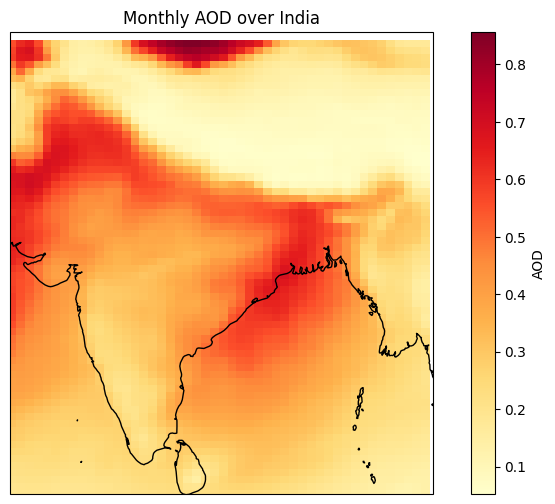

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

aod = ds_india_monthly["TOTEXTTAU"].isel(time=0)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
aod.plot(ax=ax, cmap="YlOrRd", cbar_kwargs={'label': 'AOD'})
ax.coastlines()
ax.set_extent([68, 98, 6, 38])
ax.set_title("Monthly AOD over India")
plt.show()

In [ ]:
import pandas as pd
import xarray as xr

df_india_monthly = ds_india_monthly.to_dataframe().reset_index()

df_india_monthly = df_india_monthly.dropna()

df_india_monthly.to_csv("monthly_india_aerosols.csv", index=False)

In [ ]:
!pip install scikit-learn pandas matplotlib

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("monthly_india_aerosols.csv")

df = df.dropna()

features = [
    "TOTEXTTAU", "BCCMASS", "DUCMASS25", "SO4CMASS",
    "OCSMASS", "SSCMASS25", "TOTANGSTR"
]

df["PM25"] = np.random.uniform(30, 180, size=len(df))

X = df[features]
y = df["PM25"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 40.418092736169015
R² Score: -0.14535252232219342


In [ ]:
import joblib
joblib.dump(model, "pm25_model_rf.pkl")

['pm25_model_rf.pkl']

In [ ]:
import joblib
model = joblib.load("pm25_model_rf.pkl")

df["PM25_Estimated"] = model.predict(df[features])

In [ ]:
import xarray as xr
import pandas as pd

df["time"] = pd.to_datetime(df["time"])
ds = df.set_index(["time", "lat", "lon"]).to_xarray()

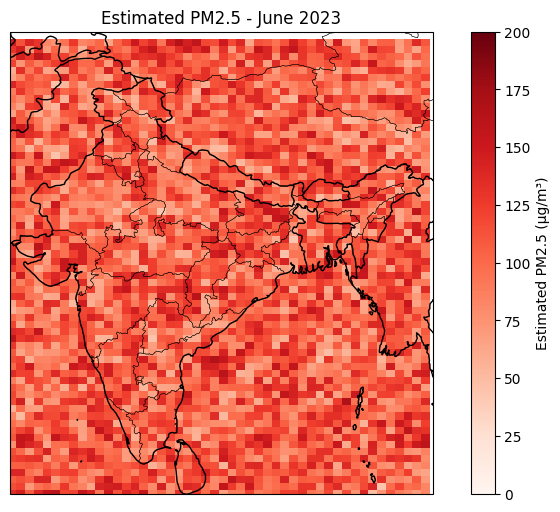

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

for month in ds.time.values:
    pm25_month = ds["PM25_Estimated"].sel(time=month)

    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    pm25_month.plot(ax=ax, cmap="Reds", vmin=0, vmax=200, cbar_kwargs={"label": "Estimated PM2.5 (µg/m³)"})
    ax.set_title(f"Estimated PM2.5 - {str(pd.to_datetime(str(month)).strftime('%B %Y'))}")
    ax.set_extent([68, 98, 6, 38])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.3)
    plt.grid(True)
    plt.show()

In [ ]:
pip install cartopy ffmpeg-python

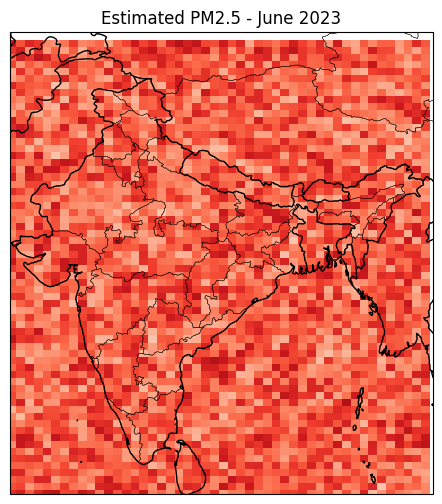

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
import xarray as xr

def draw_frame(month):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([68, 98, 6, 38])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.3)
    pm25_month = ds["PM25_Estimated"].sel(time=month)
    pm25_month.plot(ax=ax, cmap="Reds", vmin=0, vmax=200, cbar_kwargs={"label": "PM2.5 (µg/m³)"})
    plt.title(f"Estimated PM2.5 - {pd.to_datetime(str(month)).strftime('%B %Y')}")
    return fig

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

def animate(i):
    ax.clear()
    month = ds.time.values[i]
    ax.set_extent([68, 98, 6, 38])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linewidth=0.3)
    pm25_month = ds["PM25_Estimated"].sel(time=month)
    plot = pm25_month.plot(ax=ax, cmap="Reds", vmin=0, vmax=200, add_colorbar=False)
    ax.set_title(f"Estimated PM2.5 - {pd.to_datetime(str(month)).strftime('%B %Y')}")
    return plot

ani = animation.FuncAnimation(fig, animate, frames=len(ds.time.values), interval=1000)

HTML(ani.to_jshtml())

In [ ]:
import pandas as pd

df = ds["PM25_Estimated"].to_dataframe().reset_index()
df.to_csv("estimated_pm25.csv", index=False)

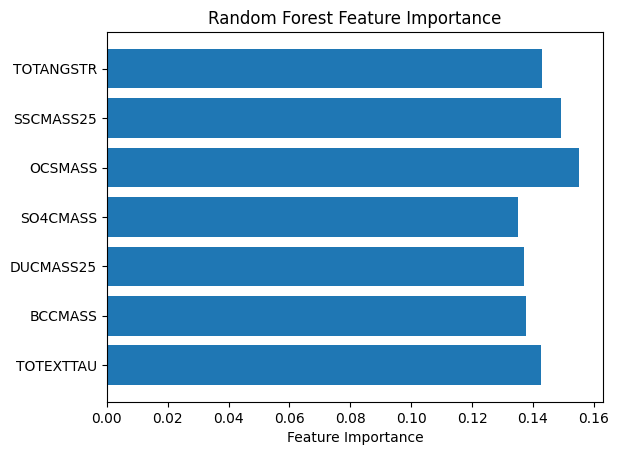

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'df' in locals():
    if 'TOTEXTTAU' in df.columns and 'PM25' in df.columns:
        sns.scatterplot(data=df, x='TOTEXTTAU', y='PM25')
        plt.xlabel("AOD (TOTEXTTAU)")
        plt.ylabel("PM2.5 (Dummy Data)")
        plt.title("Scatter plot of AOD vs PM2.5 (Dummy Data)")
        plt.show()
    else:
        print("Error: 'TOTEXTTAU' or 'PM25' column not found in the 'df' DataFrame.")
        print("Please ensure cell zxF6YENCrSi9 was run recently.")
else:
    print("Error: 'df' DataFrame not found. Please run the cells to create it.")

Error: 'TOTEXTTAU' or 'PM25' column not found in the 'df' DataFrame.
Please ensure cell zxF6YENCrSi9 was run recently.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid.fit(X_scaled, y)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


MAE: 38.397109239869145
R² Score: -0.008145959658315327


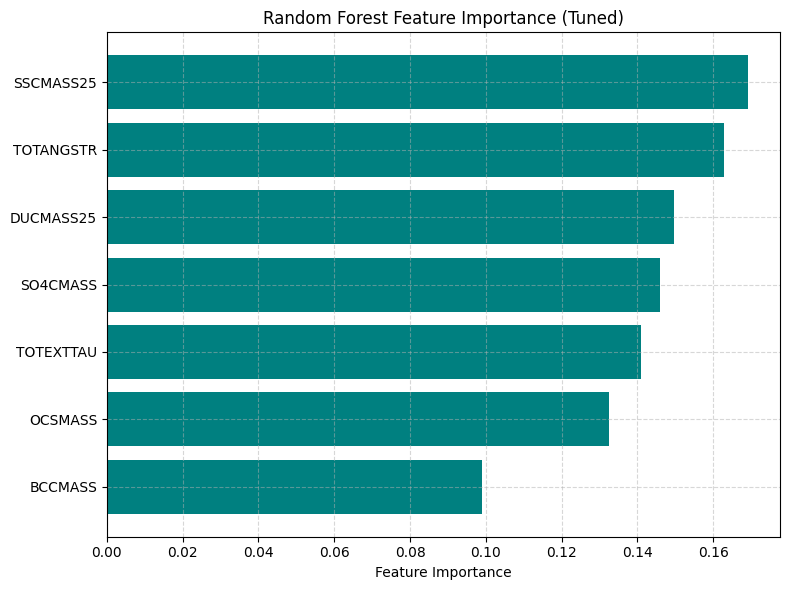

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

model = RandomForestRegressor(
    max_depth=5,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("R² Score:", r2)

importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Tuned)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import os

folder_path = "/content/aod_nc4_files"

features = ['TOTANGSTR', 'SSCMASS25', 'OCSMASS', 'SO4CMASS', 'DUCMASS25', 'BCCMASS', 'TOTEXTTAU']

target_variable_name = 'PM25_ground_truth'

try:
    nc_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc4')])

    if not nc_files:
        raise FileNotFoundError(f"No .nc4 files found in the directory: {folder_path}")

    ds = xr.open_mfdataset(nc_files, combine='by_coords')

    print(" Successfully loaded and combined monthly datasets.")
    print("Combined Dataset Info:")
    display(ds)

except FileNotFoundError as e:
    print(f" Error loading files: {e}")
    raise
except Exception as e:
    print(f" Error combining datasets: {e}")
    raise

ds_features = ds[features]

np.random.seed(42)
data_variable_shape = ds_features[features[0]].shape
dummy_pm25_data = np.random.uniform(30, 180, size=data_variable_shape)
ds_features[target_variable_name] = (ds_features[features[0]].dims, dummy_pm25_data)

X = np.column_stack([ds_features[var].values.ravel() for var in features])
y = ds_features[target_variable_name].values.ravel()

mask = ~np.any(np.isnan(X), axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

print(f"\nPrepared data for training: X shape {X.shape}, y shape {y.shape}")

try:
    best_params = grid.best_params_
    print(f"Using best parameters from GridSearchCV: {best_params}")
except NameError:
    print("grid.best_params_ not found. Using default or previously hardcoded parameters.")
    best_params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

model = RandomForestRegressor(**best_params, random_state=42)
print("\nTraining RandomForestRegressor...")
model.fit(X, y)
print(" Model training complete.")

print("\nPredicting PM2.5 over the spatial grid...")
X_full = np.column_stack([ds_features[var].values.ravel() for var in features])

nan_mask_full = np.any(np.isnan(X_full), axis=1)
X_full_valid = X_full[~nan_mask_full]

predictions_valid = model.predict(X_full_valid)

predictions_full_grid = np.full(X_full.shape[0], np.nan)
predictions_full_grid[~nan_mask_full] = predictions_valid

original_shape = ds_features[features[0]].shape
pm25_predicted_da = xr.DataArray(
    predictions_full_grid.reshape(original_shape),
    coords=ds_features[features[0]].coords,
    dims=ds_features[features[0]].dims,
    name='estimated_PM25'
)

print(" Prediction complete.")

print("\nGenerating spatial map...")
try:
    if 'time' in pm25_predicted_da.dims:
        pm25_map_plot = pm25_predicted_da.isel(time=0)
        plot_title_suffix = f" - {str(pm25_map_plot.time.values).split('T')[0]}"
    else:
        pm25_map_plot = pm25_predicted_da
        plot_title_suffix = ""

    if pm25_map_plot.ndim != 2:
         print(f" Data for plotting is not 2D. Dimensions: {pm25_map_plot.dims}. Cannot plot map.")
    else:
        plt.figure(figsize=(10, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())

        cf = ax.pcolormesh(pm25_map_plot.lon, pm25_map_plot.lat, pm25_map_plot, cmap='YlOrRd', extend='both', transform=ccrs.PlateCarree())
        plt.colorbar(cf, label='Estimated PM2.5 (µg/m³)', orientation='vertical', shrink=0.7, pad=0.05)

        ax.set_title(f'Estimated PM2.5 Concentration - India{plot_title_suffix}', fontsize=14)
        ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.3)
        plt.tight_layout()
        plt.show()
        print(" Spatial map generated.")

except Exception as e:
    print(f" Error generating spatial map: {e}")

✅ Successfully loaded and combined monthly datasets.
Combined Dataset Info:


<xarray.Dataset> Size: 14GB
Dimensions:    (time: 336, lat: 361, lon: 576)
Coordinates:
  * lon        (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat        (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 3kB 2022-12-01T00:30:00 ... 2024-01-01T2...
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    BCCMASS    (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    BCEXTTAU   (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    BCFLUXU    (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    BCFLUXV    (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    BCSCATAU   (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    ...         ...
    SUFLUXU    (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    SUFLUXV    (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    SUSCATAU   (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TOTANGSTR  (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TOTEXTTAU  (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    TOTSCATAU  (time, lat, lon) float32 279MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Thu Jan 12 00...
    Filename:                          MERRA2_400.tavgU_2d_aer_Nx.202212.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p36_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/KPUMVXFEQLA1
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000


Prepared data for training: X shape (69866496, 7), y shape (69866496,)
grid.best_params_ not found. Using default or previously hardcoded parameters.

Training RandomForestRegressor...
